# packages

In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [2]:
x,y=make_regression(n_samples=100,n_features=1,noise=6)

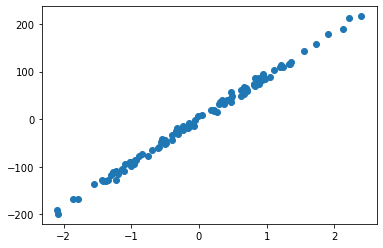

In [3]:
plt.scatter(x,y)

In [4]:
x.shape
y=y.reshape(100,1)

In [5]:
y.shape

(100, 1)

In [6]:
#matrix X
X=np.hstack((x,np.ones(x.shape)))
#theta
theta=np.random.rand(2,1)

# model

In [7]:
def model(X,theta):
    return X.dot(theta)

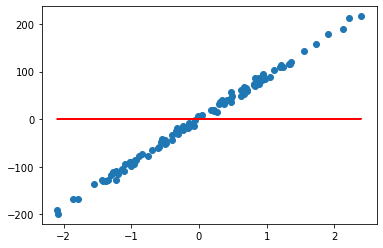

In [8]:
plt.plot(x,model(X,theta),c="r")
plt.scatter(x,y)

# cost function 

In [9]:
def cost_function(X,y,theta):
    m=len(y)
    return 1/(2*m) * np.sum((model(X,theta)-y)**2)

In [10]:
cost_function(X,y,theta)

4287.658424128052

# gradient descent

In [11]:
def grad(X,y,theta):
    m=len(y)
    return 1/m * X.T.dot(model(X,theta)-y)

In [12]:
grad(X,y,theta)

array([[-93.04230912],
       [  0.29535845]])

In [13]:
def grad_descent(X,y,theta,alpha,iterations):
    cost_history=np.zeros(iterations)
    for i in range(iterations):
        theta=theta - alpha * grad(X,y,theta)
        cost_history[i]=cost_function(X,y,theta)
    return theta,cost_history

# implementation

In [14]:
theta_final,cost_history=grad_descent(X,y,theta,alpha=0.1,iterations=1000)

In [15]:
theta_final

array([[9.19973170e+01],
       [1.52966241e-02]])

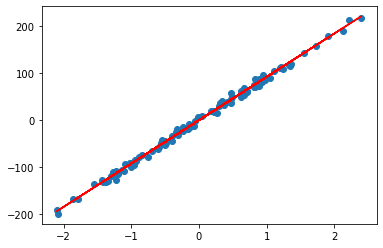

In [16]:
predictions=model(X,theta_final)
plt.scatter(x,y)
plt.plot(x,predictions,c="r")

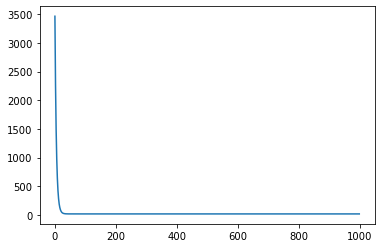

In [17]:
plt.plot(cost_history)


# coef R2 

In [18]:
def R2(y,predictions):
    u=((y-predictions)**2).sum()
    v=((y-y.mean())**2).sum()
    return 1- u/v

In [19]:
R2(y,predictions)

0.9964356943988559